In [1]:
import os 
os.chdir("../..")
from MSML.src.math_spec_mapping import (load_from_json, create_action_chains_graph, write_out_boundary_actions,
                      write_out_policies, write_out_mechanisms, load_svg_graphviz, write_basic_report_full,
                      write_action_chain_reports, write_spec_tree, create_parameter_impact_table,
                     write_entity_reports, write_wiring_report, write_entity_markdown_report,
                     write_all_markdown_reports)
os.chdir("Quai-Macro-Model/Spec")

from IPython.display import display, display_html
from copy import deepcopy
from src import math_spec_json
import numpy as np
from pprint import pprint
from simulation import state_base, params_base, vesting_schedule_translate

ms = load_from_json(deepcopy(math_spec_json))

msi = ms.build_implementation(params_base)

Placeholder has no control action options
Controller Update Control Action has no control action options
No python implementation for Price Movements Boundary Action / Hashpower Price Movement. To fix this, go to Implementations/Python/BoundaryActions and add Hashpower Price Movement
No python implementation for Controller Update Policy / Linear Controller Policy. To fix this, go to Implementations/Python/Policies and add Linear Controller Policy
No python implementation for Increment Block Number Mechanism. To fix this, go to Implementations/Python/Mechanisms and add Increment Block Number Mechanism
No python implementation for Update Historical Mined Ratio Mechanism. To fix this, go to Implementations/Python/Mechanisms and add Update Historical Mined Ratio Mechanism
No python implementation for Update Historical Qi Hash Mechanism. To fix this, go to Implementations/Python/Mechanisms and add Update Historical Qi Hash Mechanism
No python implementation for Update Historical Quai Hash M

In [2]:
state, params = msi.prepare_state_and_params(state_base, params_base, state_preperation_functions=[vesting_schedule_translate], parameter_preperation_functions=[])
spaces = msi.boundary_actions['Price Movements Boundary Action'](state, params, [])
pprint(spaces)
print()
print()
print()
spaces = msi.policies['Price Movements Policy'](state, params, spaces)
pprint(spaces)
print()
print()
print()
spaces = msi.mechanisms['Update Prices Mechanism'](state, params, spaces)
pprint(state)

KeyError: 'Price Movements Boundary Action'

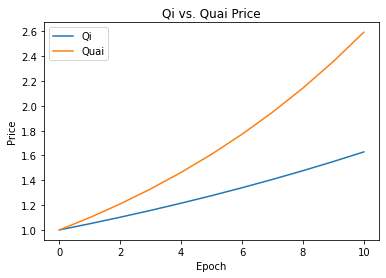

In [3]:
import matplotlib.pyplot as plt
state, params = msi.prepare_state_and_params(state_base, params_base, state_preperation_functions=[], parameter_preperation_functions=[])

qi_price = []
quai_price = []
epochs = list(range(0, 11))
qi_price.append(state["Qi Price"])
quai_price.append(state["Quai Price"])
for _ in epochs[1:]:
    msi.wiring['Price Movements Wiring'](state, params, [])
    qi_price.append(state["Qi Price"])
    quai_price.append(state["Quai Price"])

plt.plot(epochs, qi_price)
plt.plot(epochs, quai_price)
plt.xlabel("Epoch")
plt.ylabel("Price")
plt.title("Qi vs. Quai Price")
plt.legend(["Qi", "Quai"])
plt.show()